In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# open 형식이 UTF-8 로 디폴트값이 설정되어 있기 때문에
# 한글이 포함된 문서인 train.csv 는 열리지 않음. 
# 따라서 가장 넓은 값을 갖는 cp949 를 이용하여
# train.csv 를 오픈해야 에러없이 열 수 있다. 

df_store = pd.read_csv('train.csv', engine = 'python')
df_store

,custid,gender,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수,주구매코너
0,18,0,680100,15,45340,1.7,9,10,26.7,100.0,NaN,9.0,6.0,NaN,NaN,6.0,9.0,화장품
1,21,0,353450,9,39272,1.2,6,8,11.1,37.5,NaN,5.0,4.0,NaN,3.0,NaN,6.0,영캐주얼
2,23,0,5671400,36,157539,2.8,22,16,5.6,37.5,7.0,17.0,12.0,NaN,10.0,11.0,15.0,장신구
3,26,0,1964000,28,70143,1.4,15,14,39.3,28.6,5.0,8.0,15.0,NaN,NaN,18.0,10.0,화장품
4,35,0,885000,5,177000,6.0,5,2,0.0,100.0,NaN,NaN,5.0,NaN,NaN,5.0,NaN,피혁A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,49952,1,6666517,93,71683,1.8,27,39,10.8,43.6,13.0,33.0,14.0,33.0,8.0,41.0,44.0,일반식품
4996,49954,0,3112100,17,183065,3.6,10,13,29.4,38.5,4.0,6.0,6.0,1.0,3.0,NaN,14.0,디자이너부띠끄
4997,49957,1,5852482,37,158175,2.6,14,21,40.5,19.0,12.0,6.0,6.0,13.0,16.0,NaN,21.0,화장품
4998,49975,1,654498,13,50346,2.5,10,7,7.7,14.3,6.0,4.0,2.0,1.0,NaN,2.0,11.0,피혁A


In [3]:
df_화장품 = df_store[df_store['주구매코너']=='화장품']

In [4]:
df_화장품['gender'].value_counts()

0    899
1    307
Name: gender, dtype: int64

In [5]:
df_store['gender'].value_counts()

0    3479
1    1521
Name: gender, dtype: int64

In [6]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   custid     5000 non-null   int64  
 1   gender     5000 non-null   int64  
 2   총구매액       5000 non-null   int64  
 3   구매건수       5000 non-null   int64  
 4   평균구매가격     5000 non-null   int64  
 5   평균할부개월수    5000 non-null   float64
 6   구매브랜드종류    5000 non-null   int64  
 7   내점일수       5000 non-null   int64  
 8   수입상품_구매비율  5000 non-null   float64
 9   주말방문비율     5000 non-null   float64
 10  가을_구매건수    4055 non-null   float64
 11  겨울_구매건수    4103 non-null   float64
 12  봄_구매건수     4311 non-null   float64
 13  여름_구매건수    3978 non-null   float64
 14  아침_구매건수    3558 non-null   float64
 15  저녁_구매건수    4033 non-null   float64
 16  점심_구매건수    4855 non-null   float64
 17  주구매코너      5000 non-null   object 
dtypes: float64(10), int64(7), object(1)
memory usage: 703.2+ KB


In [7]:
# 한글로 하면 계속 에러날거같으니까
# 그냥 죄다 영어로 바꾸자
# 나중에 어렵게하고싶지 않아.

df_store=df_store.rename(columns={'총구매액':'tot_price', '구매건수':'count', 
                         '평균구매가격':'avg_price', '평균할부개월수':'avg_install',
                         '구매브랜드종류':'brand_category', '내점일수':'visited', 
                         '수입상품_구매비율':'income_rate', '주말방문비율':'week_visited',
                         '가을_구매건수':'fall_count', '겨울_구매건수':'wint_count',
                         '봄_구매건수':'spring_count', '여름_구매건수':'summer_count',
                         '아침_구매건수':'morning_count', '저녁_구매건수':'night_count',
                         '점심_구매건수':'after_count', '주구매코너':'major'})
df_store

,custid,gender,tot_price,count,avg_price,avg_install,brand_category,visited,income_rate,week_visited,fall_count,wint_count,spring_count,summer_count,morning_count,night_count,after_count,major
0,18,0,680100,15,45340,1.7,9,10,26.7,100.0,NaN,9.0,6.0,NaN,NaN,6.0,9.0,화장품
1,21,0,353450,9,39272,1.2,6,8,11.1,37.5,NaN,5.0,4.0,NaN,3.0,NaN,6.0,영캐주얼
2,23,0,5671400,36,157539,2.8,22,16,5.6,37.5,7.0,17.0,12.0,NaN,10.0,11.0,15.0,장신구
3,26,0,1964000,28,70143,1.4,15,14,39.3,28.6,5.0,8.0,15.0,NaN,NaN,18.0,10.0,화장품
4,35,0,885000,5,177000,6.0,5,2,0.0,100.0,NaN,NaN,5.0,NaN,NaN,5.0,NaN,피혁A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,49952,1,6666517,93,71683,1.8,27,39,10.8,43.6,13.0,33.0,14.0,33.0,8.0,41.0,44.0,일반식품
4996,49954,0,3112100,17,183065,3.6,10,13,29.4,38.5,4.0,6.0,6.0,1.0,3.0,NaN,14.0,디자이너부띠끄
4997,49957,1,5852482,37,158175,2.6,14,21,40.5,19.0,12.0,6.0,6.0,13.0,16.0,NaN,21.0,화장품
4998,49975,1,654498,13,50346,2.5,10,7,7.7,14.3,6.0,4.0,2.0,1.0,NaN,2.0,11.0,피혁A


In [8]:
df_store['major'].value_counts()

일반식품        1306
화장품         1206
유니캐주얼        410
유아동복         383
스포츠          301
영캐주얼         246
캐릭터캐주얼       188
수입명품         136
섬유            96
니트단품          91
트래디셔널캐주얼      91
정장셔츠          90
엘레강스캐주얼       78
피혁A           75
장신구           68
피혁B           56
디자이너부띠끄       51
문화완구          38
조리욕실          28
가전            18
기타바이어         12
도자기크리스탈       11
침구수예           8
가구             7
타운모피           6
Name: major, dtype: int64

In [9]:
#df_store['주구매코너'] = df_store['주구매코너'].astype('category')
#df_store['주구매코너'] = df_store['주구매코너'].cat.codes
#df_store['주구매코너'].value_counts()

In [10]:
df_corr = df_store.corr()
df_corr

,custid,gender,tot_price,count,avg_price,avg_install,brand_category,visited,income_rate,week_visited,fall_count,wint_count,spring_count,summer_count,morning_count,night_count,after_count
custid,1.000000,0.262472,0.217251,0.218914,0.117939,0.093048,0.154303,0.212969,-0.017958,-0.162393,0.169628,0.164004,0.189248,0.209086,0.170199,0.025959,0.245526
gender,0.262472,1.000000,0.099137,0.094022,0.072181,-0.020066,0.083988,0.084255,-0.021294,0.020457,0.082396,0.062853,0.073478,0.098237,0.117025,-0.017439,0.098814
tot_price,0.217251,0.099137,1.000000,0.712183,0.376395,0.137335,0.714774,0.617210,-0.048053,-0.048515,0.636912,0.598012,0.621589,0.600210,0.411808,0.375806,0.705898
count,0.218914,0.094022,0.712183,1.000000,-0.057376,-0.037878,0.869075,0.942115,-0.210022,-0.096558,0.890560,0.872558,0.891125,0.879405,0.643542,0.631686,0.944120
avg_price,0.117939,0.072181,0.376395,-0.057376,1.000000,0.407556,0.002931,-0.091136,0.189608,0.036426,-0.030972,-0.054408,-0.051558,-0.056996,-0.045784,-0.096015,-0.025700
avg_install,0.093048,-0.020066,0.137335,-0.037878,0.407556,1.000000,-0.002074,-0.076343,0.097727,-0.001625,-0.015512,-0.037181,-0.029433,-0.035267,-0.061617,-0.056620,-0.006523
brand_category,0.154303,0.083988,0.714774,0.869075,0.002931,-0.002074,1.000000,0.780303,-0.234547,-0.080674,0.753557,0.752453,0.768225,0.732592,0.544562,0.557397,0.809973
visited,0.212969,0.084255,0.617210,0.942115,-0.091136,-0.076343,0.780303,1.000000,-0.225363,-0.114795,0.827788,0.820413,0.832312,0.814047,0.603499,0.622984,0.873686
income_rate,-0.017958,-0.021294,-0.048053,-0.210022,0.189608,0.097727,-0.234547,-0.225363,1.000000,0.016123,-0.143282,-0.159061,-0.170131,-0.154914,-0.102365,-0.150986,-0.175920
week_visited,-0.162393,0.020457,-0.048515,-0.096558,0.036426,-0.001625,-0.080674,-0.114795,0.016123,1.000000,-0.093130,-0.091832,-0.083555,-0.100046,-0.102636,-0.027938,-0.100132


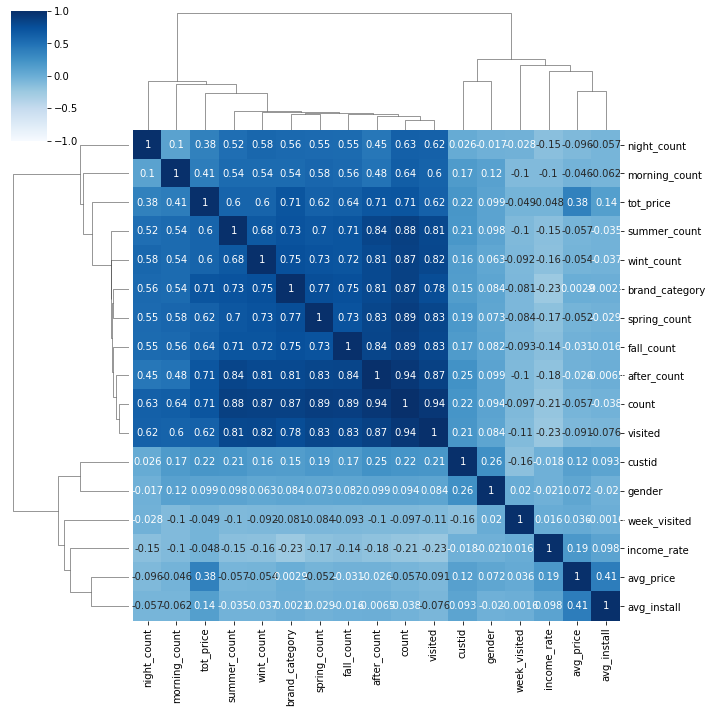

In [11]:
import seaborn as sns
df_mapping = sns.clustermap(df_corr, cbar = True, 
                            annot=True,
                            cmap = 'Blues',
                            vmin=-1, vmax=1)

In [12]:
# 상관계수 내림차수 나열
df_corr.gender.sort_values(ascending=False)

gender            1.000000
custid            0.262472
morning_count     0.117025
tot_price         0.099137
after_count       0.098814
summer_count      0.098237
count             0.094022
visited           0.084255
brand_category    0.083988
fall_count        0.082396
spring_count      0.073478
avg_price         0.072181
wint_count        0.062853
week_visited      0.020457
night_count      -0.017439
avg_install      -0.020066
income_rate      -0.021294
Name: gender, dtype: float64

In [13]:
# major 를 숫자화 한다
df_store['major'] = df_store['major'].astype('category')
df_store['major'] = df_store['major'].cat.codes
df_store['major'].value_counts()

14    1306
24    1206
12     410
13     383
9      301
11     246
19     188
8      136
7       96
21      91
3       91
16      90
10      78
22      75
15      68
23      56
5       51
6       38
17      28
1       18
2       12
4       11
18       8
0        7
20       6
Name: major, dtype: int64

In [14]:
#주구매코너 별로 남녀 수 구별
# 하지만 여기 gender수는 여자가 많을수 밖에 없는게 일딴 에초에 여성 고객 count
# 수가 월등히 많다
df_store.groupby(['major','gender']).agg({'gender':'count'})


gender
major gender        
0     0            6
      1            1
1     0           13
      1            5
2     0            9
      1            3
3     0           74
      1           17
4     0            6
      1            5
5     0           38
      1           13
6     0           21
      1           17
7     0           75
      1           21
8     0           85
      1           51
9     0          180
      1          121
10    0           60
      1           18
11    0          196
      1           50
12    0          301
      1          109
13    0          241
      1          142
14    0          854
      1          452
15    0           52
      1           16
16    0           45
      1           45
17    0           24
      1            4
18    0            7
      1            1
19    0          140
      1           48
20    0            4
      1            2
21    0           57
      1           34
22    0           46
      1           29
23    0           46
      1           10
24    0          899
      1          307

In [15]:
# 남녀 구매비율이 없는거 삭제 하기

In [16]:
# 학습용 데이터와 훈련용 데이터로 분리

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
copy_store = df_store.copy()

In [19]:
copy_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   custid          5000 non-null   int64  
 1   gender          5000 non-null   int64  
 2   tot_price       5000 non-null   int64  
 3   count           5000 non-null   int64  
 4   avg_price       5000 non-null   int64  
 5   avg_install     5000 non-null   float64
 6   brand_category  5000 non-null   int64  
 7   visited         5000 non-null   int64  
 8   income_rate     5000 non-null   float64
 9   week_visited    5000 non-null   float64
 10  fall_count      4055 non-null   float64
 11  wint_count      4103 non-null   float64
 12  spring_count    4311 non-null   float64
 13  summer_count    3978 non-null   float64
 14  morning_count   3558 non-null   float64
 15  night_count     4033 non-null   float64
 16  after_count     4855 non-null   float64
 17  major           5000 non-null   i

In [20]:
copy_store = copy_store.fillna(0)
copy_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   custid          5000 non-null   int64  
 1   gender          5000 non-null   int64  
 2   tot_price       5000 non-null   int64  
 3   count           5000 non-null   int64  
 4   avg_price       5000 non-null   int64  
 5   avg_install     5000 non-null   float64
 6   brand_category  5000 non-null   int64  
 7   visited         5000 non-null   int64  
 8   income_rate     5000 non-null   float64
 9   week_visited    5000 non-null   float64
 10  fall_count      5000 non-null   float64
 11  wint_count      5000 non-null   float64
 12  spring_count    5000 non-null   float64
 13  summer_count    5000 non-null   float64
 14  morning_count   5000 non-null   float64
 15  night_count     5000 non-null   float64
 16  after_count     5000 non-null   float64
 17  major           5000 non-null   i

In [21]:
copy_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   custid          5000 non-null   int64  
 1   gender          5000 non-null   int64  
 2   tot_price       5000 non-null   int64  
 3   count           5000 non-null   int64  
 4   avg_price       5000 non-null   int64  
 5   avg_install     5000 non-null   float64
 6   brand_category  5000 non-null   int64  
 7   visited         5000 non-null   int64  
 8   income_rate     5000 non-null   float64
 9   week_visited    5000 non-null   float64
 10  fall_count      5000 non-null   float64
 11  wint_count      5000 non-null   float64
 12  spring_count    5000 non-null   float64
 13  summer_count    5000 non-null   float64
 14  morning_count   5000 non-null   float64
 15  night_count     5000 non-null   float64
 16  after_count     5000 non-null   float64
 17  major           5000 non-null   i

In [22]:
dfX = copy_store.drop(['custid', 'gender'], axis=1)
dfy = copy_store['gender']

X_train, X_test, y_train, y_test = train_test_split(dfX, dfy, test_size = 0.25, random_state = 0)


In [23]:
display(X_train.shape, X_test.shape)
X_train

(3750, 16)

(1250, 16)

,tot_price,count,avg_price,avg_install,brand_category,visited,income_rate,week_visited,fall_count,wint_count,spring_count,summer_count,morning_count,night_count,after_count,major
4154,404285,3,134762,2.3,3,2,33.3,0.0,0.0,1.0,2.0,0.0,1.0,0.0,2.0,22
4820,6169420,38,162353,2.1,29,26,13.2,34.6,8.0,13.0,7.0,10.0,13.0,0.0,25.0,10
1202,2407157,32,75224,1.7,22,17,9.4,52.9,3.0,3.0,6.0,20.0,3.0,8.0,21.0,14
3759,4664283,78,59798,1.8,24,22,1.3,45.5,17.0,12.0,29.0,20.0,0.0,23.0,55.0,14
622,3299200,11,299927,1.9,9,3,45.5,33.3,0.0,0.0,11.0,0.0,0.0,0.0,11.0,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4931,7326999,143,51238,1.2,15,115,2.8,33.9,57.0,15.0,20.0,51.0,6.0,38.0,99.0,14
3264,152000,1,152000,3.0,1,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,24
1653,148000,4,37000,1.0,3,4,50.0,25.0,0.0,1.0,1.0,2.0,0.0,2.0,2.0,24
2607,1623380,12,135282,1.3,11,8,8.3,12.5,2.0,0.0,4.0,6.0,1.0,1.0,10.0,11


In [24]:
# 트리 탐색
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=6, random_state=0)

tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [25]:
pred_tree = tree.predict(X_test); pred_tree

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [26]:
# 트리 확률
display(tree.score(X_train, y_train))
display(tree.score(X_test, y_test))

0.7352

0.6712

In [27]:
# 아래에 Neural Network 모형을 생성하는 코드를 작성하시오.
from sklearn.neural_network import MLPClassifier 
mlp = MLPClassifier()
mlp.fit(X_train, y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [28]:
display(mlp.score(X_train, y_train))
display(mlp.score(X_test, y_test))

0.38

0.3584

## 데이터 정제작업

In [29]:
dfX = copy_store.drop(['custid', 'gender'], axis=1)
dfy = copy_store['gender']

X_train, X_test, y_train, y_test = train_test_split(dfX, dfy, test_size = 0.25, random_state = 0)


In [30]:
display(X_train.shape, X_test.shape)
X_train

(3750, 16)

(1250, 16)

,tot_price,count,avg_price,avg_install,brand_category,visited,income_rate,week_visited,fall_count,wint_count,spring_count,summer_count,morning_count,night_count,after_count,major
4154,404285,3,134762,2.3,3,2,33.3,0.0,0.0,1.0,2.0,0.0,1.0,0.0,2.0,22
4820,6169420,38,162353,2.1,29,26,13.2,34.6,8.0,13.0,7.0,10.0,13.0,0.0,25.0,10
1202,2407157,32,75224,1.7,22,17,9.4,52.9,3.0,3.0,6.0,20.0,3.0,8.0,21.0,14
3759,4664283,78,59798,1.8,24,22,1.3,45.5,17.0,12.0,29.0,20.0,0.0,23.0,55.0,14
622,3299200,11,299927,1.9,9,3,45.5,33.3,0.0,0.0,11.0,0.0,0.0,0.0,11.0,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4931,7326999,143,51238,1.2,15,115,2.8,33.9,57.0,15.0,20.0,51.0,6.0,38.0,99.0,14
3264,152000,1,152000,3.0,1,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,24
1653,148000,4,37000,1.0,3,4,50.0,25.0,0.0,1.0,1.0,2.0,0.0,2.0,2.0,24
2607,1623380,12,135282,1.3,11,8,8.3,12.5,2.0,0.0,4.0,6.0,1.0,1.0,10.0,11


In [31]:
dfX = copy_store.drop(['custid', 'gender'], axis=1)
dfy = copy_store['gender']

X_train, X_test, y_train, y_test = train_test_split(dfX, dfy, test_size = 0.25, random_state = 0)


In [32]:
df_store.describe()

,custid,gender,tot_price,count,avg_price,avg_install,brand_category,visited,income_rate,week_visited,fall_count,wint_count,spring_count,summer_count,morning_count,night_count,after_count,major
count,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.0000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,4055.000000,4103.000000,4311.000000,3978.000000,3558.000000,4033.000000,4855.000000,5000.000000
mean,25200.496600,0.304200,3.360421e+06,34.538400,102564.0746,1.915660,17.368800,18.054800,17.989860,38.571880,10.170160,9.911772,10.572489,11.364002,8.678471,9.210265,21.559011,15.509000
std,14376.680764,0.460114,5.088433e+06,40.109424,79091.0458,0.730558,14.582432,19.369182,19.483598,24.509818,11.316941,10.785779,11.745474,12.665271,12.734328,12.351998,26.484375,5.936242
min,18.000000,0.000000,-1.237971e+06,1.000000,-72822.0000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,12835.750000,0.000000,7.223850e+05,10.000000,54811.0000,1.400000,7.000000,6.000000,5.000000,22.200000,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,5.000000,12.000000
50%,25345.000000,0.000000,1.806748e+06,21.000000,82201.5000,1.800000,13.000000,12.000000,12.500000,34.850000,6.000000,6.000000,7.000000,7.000000,4.000000,5.000000,13.000000,14.000000
75%,37584.250000,1.000000,4.030409e+06,44.000000,124142.7500,2.200000,24.000000,23.000000,25.000000,50.000000,13.000000,13.000000,14.000000,15.000000,10.000000,11.000000,28.000000,23.000000
max,49993.000000,1.000000,9.286883e+07,491.000000,926117.0000,10.000000,134.000000,249.000000,100.000000,100.000000,130.000000,113.000000,128.000000,121.000000,174.000000,167.000000,366.000000,24.000000


In [33]:
copy_store.isnull().sum()

custid            0
gender            0
tot_price         0
count             0
avg_price         0
avg_install       0
brand_category    0
visited           0
income_rate       0
week_visited      0
fall_count        0
wint_count        0
spring_count      0
summer_count      0
morning_count     0
night_count       0
after_count       0
major             0
dtype: int64

In [34]:
copy_store['gender'].value_counts()

0    3479
1    1521
Name: gender, dtype: int64

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # 플롯의 seaborn 기본값 설정

In [36]:
def bar_chart(feature):
    male = copy_store[copy_store['gender']==1][feature].value_counts()
    female = copy_store[copy_store['gender']==0][feature].value_counts()
    df = pd.DataFrame([male,female])
    df.index = ['male','female']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

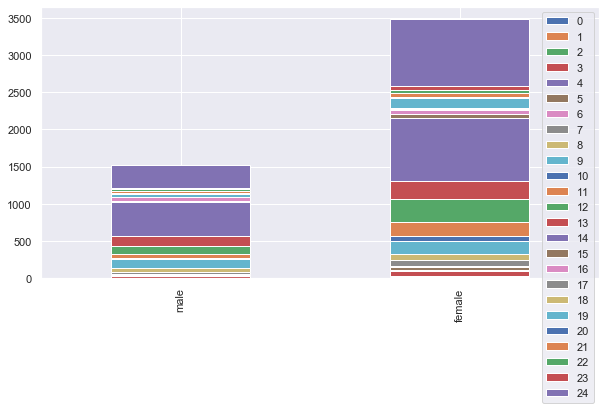

In [37]:
bar_chart('major')

In [38]:
copy_store

,custid,gender,tot_price,count,avg_price,avg_install,brand_category,visited,income_rate,week_visited,fall_count,wint_count,spring_count,summer_count,morning_count,night_count,after_count,major
0,18,0,680100,15,45340,1.7,9,10,26.7,100.0,0.0,9.0,6.0,0.0,0.0,6.0,9.0,24
1,21,0,353450,9,39272,1.2,6,8,11.1,37.5,0.0,5.0,4.0,0.0,3.0,0.0,6.0,11
2,23,0,5671400,36,157539,2.8,22,16,5.6,37.5,7.0,17.0,12.0,0.0,10.0,11.0,15.0,15
3,26,0,1964000,28,70143,1.4,15,14,39.3,28.6,5.0,8.0,15.0,0.0,0.0,18.0,10.0,24
4,35,0,885000,5,177000,6.0,5,2,0.0,100.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,49952,1,6666517,93,71683,1.8,27,39,10.8,43.6,13.0,33.0,14.0,33.0,8.0,41.0,44.0,14
4996,49954,0,3112100,17,183065,3.6,10,13,29.4,38.5,4.0,6.0,6.0,1.0,3.0,0.0,14.0,5
4997,49957,1,5852482,37,158175,2.6,14,21,40.5,19.0,12.0,6.0,6.0,13.0,16.0,0.0,21.0,24
4998,49975,1,654498,13,50346,2.5,10,7,7.7,14.3,6.0,4.0,2.0,1.0,0.0,2.0,11.0,22


In [39]:
def bar_chart(feature):
    tot_price = copy_store[copy_store['tot_price']>=1][feature].value_counts()
    count = copy_store[copy_store['count']>=1][feature].value_counts()
    avg_price = copy_store[copy_store['avg_price']>=1][feature].value_counts()
    avg_install = copy_store[copy_store['avg_install']>=1][feature].value_counts()
    brand_category = copy_store[copy_store['brand_category']>=1][feature].value_counts()
    visited = copy_store[copy_store['visited']>=1][feature].value_counts()
    income_rate = copy_store[copy_store['income_rate']>=1][feature].value_counts()
    week_visited = copy_store[copy_store['week_visited']>=1][feature].value_counts()
    fall_count = copy_store[copy_store['fall_count']>=1][feature].value_counts()
    wint_count = copy_store[copy_store['wint_count']>=1][feature].value_counts()
    spring_count = copy_store[copy_store['spring_count']>=1][feature].value_counts()
    summer_count = copy_store[copy_store['summer_count']>=1][feature].value_counts()
    morning_count = copy_store[copy_store['morning_count']>=1][feature].value_counts()
    night_count = copy_store[copy_store['night_count']>=1][feature].value_counts()
    after_count = copy_store[copy_store['after_count']>=1][feature].value_counts()
    major = copy_store[copy_store['major']>=1][feature].value_counts()
    df = pd.DataFrame([tot_price
                       ,count
                       ,avg_price
                       ,avg_install
                       ,brand_category
                       ,visited
                       ,income_rate
                       ,week_visited
                       ,fall_count
                       ,wint_count
                       ,spring_count
                       ,summer_count
                       , morning_count
                       , night_count
                       ,after_count
                       ,major ])
    df.index = ['tot_price,count'
                ,'avg_price'
                ,'count'
                ,'avg_install'
                ,'brand_category'
                ,'visited'
                ,'income_rate'
                ,'week_visited'
                ,'fall_count'
                ,'wint_count'
                ,'spring_count'
                ,'summer_count'
                ,'morning_count'
                , 'night_count'
                ,'after_count'
                ,'major']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

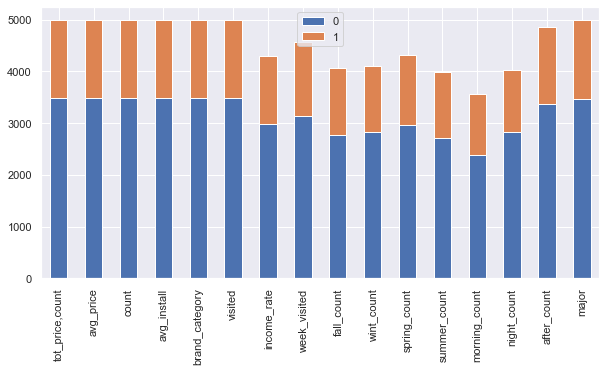

In [40]:
bar_chart('gender')

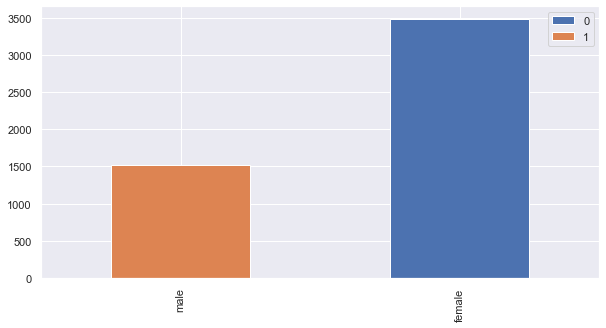

In [53]:
def bar_chart(feature):
    male = copy_store[copy_store['gender']==1][feature].value_counts()
    female = copy_store[copy_store['gender']==0][feature].value_counts()

    df = pd.DataFrame([male,female])
    df.index = ['male', 'female']
    df.plot(kind='bar',stacked=True, figsize=(10,5))
bar_chart('gender')

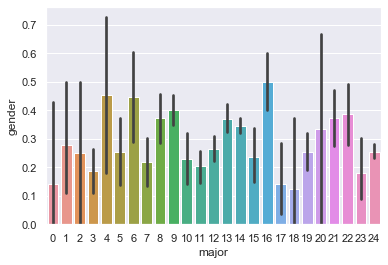

In [58]:
sns.barplot(data=copy_store, x="major", y= "gender")
plt.show()

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Unrecognized location 'gender'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


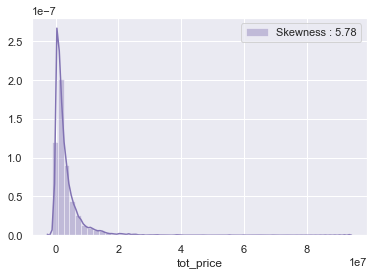

In [61]:
g = sns.distplot(copy_store["tot_price"], color="m", label="Skewness : %.2f"%(copy_store["tot_price"].skew()))
g = g.legend(loc="gender")

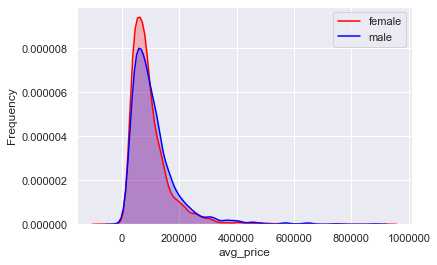

In [67]:
g = sns.kdeplot(copy_store["avg_price"][(copy_store["gender"] == 0) & (copy_store["avg_price"].notnull())], color="Red", shade = True)
g = sns.kdeplot(copy_store["avg_price"][(copy_store["gender"] == 1) & (copy_store["avg_price"].notnull())], ax =g, color="Blue", shade= True)
g.set_xlabel("avg_price")
g.set_ylabel("Frequency")
g = g.legend(["female","male"])

In [50]:
copy_store['gender'].value_counts()

0    3479
1    1521
Name: gender, dtype: int64

In [41]:
copy_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   custid          5000 non-null   int64  
 1   gender          5000 non-null   int64  
 2   tot_price       5000 non-null   int64  
 3   count           5000 non-null   int64  
 4   avg_price       5000 non-null   int64  
 5   avg_install     5000 non-null   float64
 6   brand_category  5000 non-null   int64  
 7   visited         5000 non-null   int64  
 8   income_rate     5000 non-null   float64
 9   week_visited    5000 non-null   float64
 10  fall_count      5000 non-null   float64
 11  wint_count      5000 non-null   float64
 12  spring_count    5000 non-null   float64
 13  summer_count    5000 non-null   float64
 14  morning_count   5000 non-null   float64
 15  night_count     5000 non-null   float64
 16  after_count     5000 non-null   float64
 17  major           5000 non-null   i